In [22]:
import pandas as pd
import numpy as np


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


In [31]:
bank_data = pd.read_csv('bank.csv', delimiter=';')
bank_data = bank_data[['age', 'default', 'y']]


In [32]:
bank_data['default'] = bank_data['default'].map({'no': 0, 'yes': 1, 'unknown': 0})
bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})


In [33]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [35]:
y_pred = rf.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.887292817679558


In [40]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)

    graph = graphviz.Source(dot_data)
#    display(graph)


In [41]:
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

rf = RandomForestClassifier()


In [42]:
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B038E8FF10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B038393490>})

In [43]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)


Best hyperparameters: {'max_depth': 3, 'n_estimators': 293}


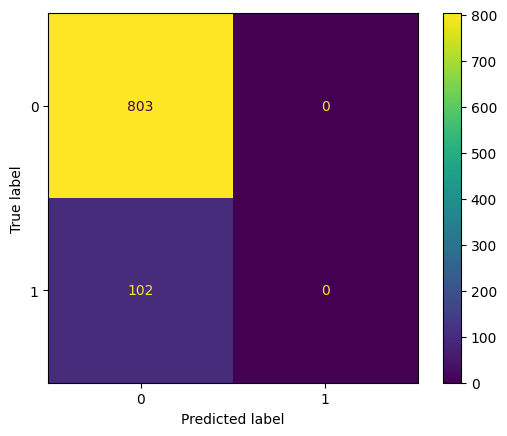

In [44]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [46]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall', recall)


Accuracy:  0.887292817679558
Precision:  0.0
Recall 0.0


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

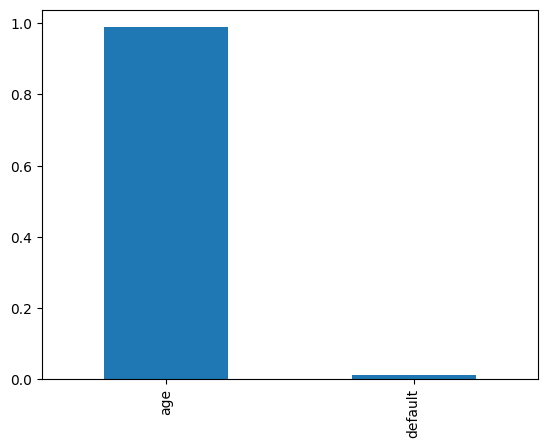

In [47]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()
